# 逻辑回归
sklearn中的LogisticRegression类

```
LogisticRegression(penalty='l2',        # 选择正则化方法
             dual=False,         
             tol=1e4,
             C=1.0,             # 正则化强度，C为正则化系数的倒数，C越大惩罚越少
             fit_intercept=True,    
             intercept_scaling=1,
             class_weight=None,
             random_state=None,
             solver='liblinear',     # 损失函数的优化方法，liblinear,newton-cg,lbfgs,sag。多分类不能用liblinear
             max_iter=100,       
             multi_class='ovr',     # 分类方式，ovr=one-vs-rest,为二分类，multinomial多分类
             verbose=0,
             warm_start=False, 
             n_jobs=1            # 使用的CPU核数
             )
```

## 参考
* https://blog.csdn.net/weixin_50304531/article/details/109717609
* https://www.bilibili.com/video/BV1WW4y1n7e2

## 预处理

In [40]:
import numpy as np
import pandas as pd
data_1 = pd.read_csv('/data/Iris.csv')
data_1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
data_1['Species'].drop_duplicates()

0          Iris-setosa
50     Iris-versicolor
100     Iris-virginica
Name: Species, dtype: object

In [51]:
data = data_1.sample(len(data_1), random_state = 0)

In [11]:
X = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = data['Species']
X.shape

(150, 4)

In [12]:
y.unique()

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [13]:
y = y.map({'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2})

## 训练预测 单分类

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [31]:
train_X,test_X,train_y,test_y =train_test_split(X,y,test_size=0.3)

In [32]:
log_reg = LogisticRegression() # 这里默认参数，只会对0和非0分类
log_reg.fit(train_X,train_y)
log_reg.score(test_X, test_y)

1.0

In [34]:
log_reg.coef_, log_reg.intercept_

(array([[-0.37976731,  0.893243  , -2.22984277, -0.97513412],
        [ 0.49560534, -0.23535234, -0.17460387, -0.70191187],
        [-0.11583803, -0.65789067,  2.40444664,  1.67704599]]),
 array([  8.68349126,   1.42221126, -10.10570252]))

In [36]:
from sklearn.metrics import classification_report
print(classification_report(test_y, log_reg.predict(test_X)))
# 专门做模型评估的结果

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## 训练验证 多分类

In [37]:
log_reg_multi = LogisticRegression(solver='newton-cg', multi_class = 'multinomial')
log_reg_multi.fit(train_X,train_y)
log_reg_multi.score(test_X, test_y)

1.0

In [38]:
print(classification_report(test_y, log_reg_multi.predict(test_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## 可视化
这里只对原始数据进行散点图的可视化。由于分类没有出错，所以只做这个可视化。可以看到这些数据都是线性可分的，这也是分类没有出错的主要原因。

In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.family'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

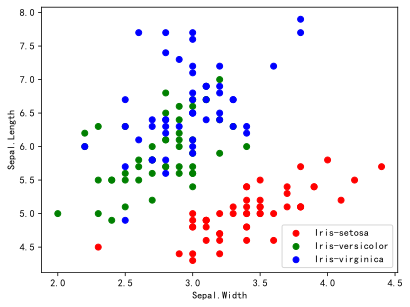

In [53]:
plt.scatter(x = data_1['SepalWidthCm'][:50], y =data_1['SepalLengthCm'][:50], color = 'r', label ='Iris-setosa')
plt.scatter(x = data_1['SepalWidthCm'][50:100], y =data_1['SepalLengthCm'][50:100], color = 'g', label ='Iris-versicolor')
plt.scatter(x = data_1['SepalWidthCm'][100:150], y =data_1['SepalLengthCm'][100:150], color = 'b', label ='Iris-virginica')
plt.xlabel('Sepal.Width')
plt.ylabel('Sepal.Length')
plt.legend()
plt.show()

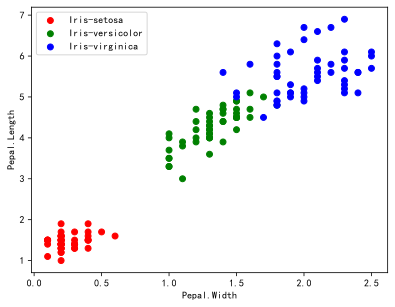

In [54]:
plt.scatter(x = data_1['PetalWidthCm'][:50], y =data_1['PetalLengthCm'][:50], color = 'r', label ='Iris-setosa')
plt.scatter(x = data_1['PetalWidthCm'][50:100], y =data_1['PetalLengthCm'][50:100], color = 'g', label ='Iris-versicolor')
plt.scatter(x = data_1['PetalWidthCm'][100:150], y =data_1['PetalLengthCm'][100:150], color = 'b', label ='Iris-virginica')
plt.xlabel('Pepal.Width')
plt.ylabel('Pepal.Length')
plt.legend()
plt.show()